Learning Path Recommendation System

Creating sample data...
Created 100 interns and 21 courses

Generating learning interactions...
Generated 1085 learning interactions

Building rating matrix...
Matrix size: (100, 21)
Sparsity: 48.3%

Training recommendation model...
Model training completed

Testing recommendations...

Recommendations for Intern_1 (INT_001)
Department: Data Science, Skill: Beginner

Collaborative Filtering:
  1. JavaScript Fundamentals (Web Dev)
     Difficulty: Beginner, Duration: 22h
     Predicted Rating: 2.72
  2. Full Stack Project (Web Dev)
     Difficulty: Advanced, Duration: 40h
     Predicted Rating: 2.19
  3. Computer Vision (AI/ML)
     Difficulty: Advanced, Duration: 30h
     Predicted Rating: 1.52

Content-Based:
  1. JavaScript Fundamentals (Web Dev)
     Difficulty: Beginner, Duration: 22h
     Similarity Score: 0.75
  2. Git and Version Control (DevOps)
     Difficulty: Beginner, Duration: 15h
     Similarity Score: 0.5
  3. Mobile App Design (Mobile

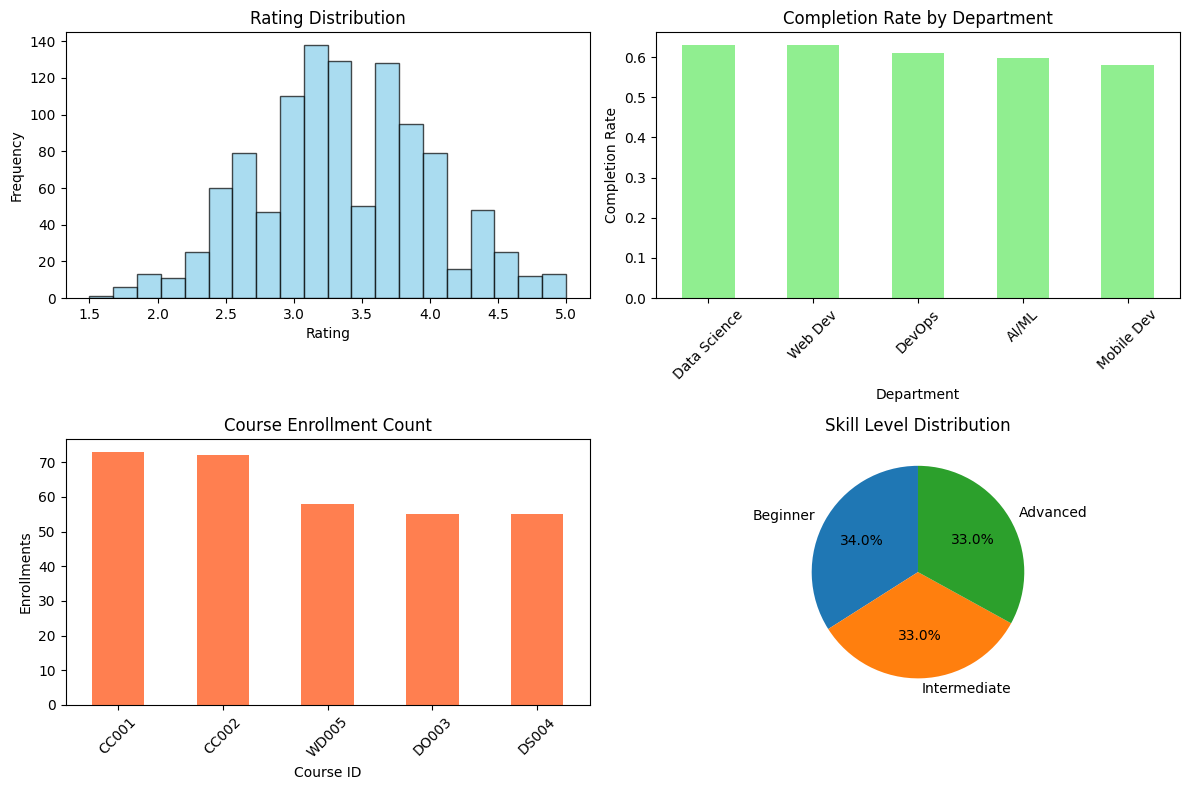


Learning Path Recommendation System Ready!
The system can now provide personalized learning recommendations for interns.


In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

print("Learning Path Recommendation System")
print("===================================")

print("\nCreating sample data...")

interns = [
    {'intern_id': f'INT_{i:03d}', 'name': f'Intern_{i}', 'department': dept, 'skill_level': level}
    for i, (dept, level) in enumerate(zip(
        ['Data Science', 'Web Dev', 'Mobile Dev', 'AI/ML', 'DevOps'] * 20,
        ['Beginner', 'Intermediate', 'Advanced'] * 33 + ['Beginner']
    ), 1)
]

courses = [
    {'course_id': 'DS001', 'title': 'Python Fundamentals', 'category': 'Data Science', 'difficulty': 'Beginner', 'duration': 20},
    {'course_id': 'DS002', 'title': 'Statistics for Data Science', 'category': 'Data Science', 'difficulty': 'Beginner', 'duration': 25},
    {'course_id': 'DS003', 'title': 'Data Visualization with Matplotlib', 'category': 'Data Science', 'difficulty': 'Intermediate', 'duration': 15},
    {'course_id': 'DS004', 'title': 'Machine Learning Basics', 'category': 'Data Science', 'difficulty': 'Intermediate', 'duration': 30},
    {'course_id': 'DS005', 'title': 'Deep Learning Fundamentals', 'category': 'Data Science', 'difficulty': 'Advanced', 'duration': 35},
    {'course_id': 'WD001', 'title': 'HTML/CSS Basics', 'category': 'Web Dev', 'difficulty': 'Beginner', 'duration': 18},
    {'course_id': 'WD002', 'title': 'JavaScript Fundamentals', 'category': 'Web Dev', 'difficulty': 'Beginner', 'duration': 22},
    {'course_id': 'WD003', 'title': 'React.js Development', 'category': 'Web Dev', 'difficulty': 'Intermediate', 'duration': 28},
    {'course_id': 'WD004', 'title': 'Node.js Backend', 'category': 'Web Dev', 'difficulty': 'Intermediate', 'duration': 25},
    {'course_id': 'WD005', 'title': 'Full Stack Project', 'category': 'Web Dev', 'difficulty': 'Advanced', 'duration': 40},
    {'course_id': 'MD001', 'title': 'Mobile App Design', 'category': 'Mobile Dev', 'difficulty': 'Beginner', 'duration': 20},
    {'course_id': 'MD002', 'title': 'React Native Basics', 'category': 'Mobile Dev', 'difficulty': 'Intermediate', 'duration': 30},
    {'course_id': 'MD003', 'title': 'iOS Development', 'category': 'Mobile Dev', 'difficulty': 'Advanced', 'duration': 35},
    {'course_id': 'AI001', 'title': 'AI Ethics and Principles', 'category': 'AI/ML', 'difficulty': 'Beginner', 'duration': 12},
    {'course_id': 'AI002', 'title': 'Natural Language Processing', 'category': 'AI/ML', 'difficulty': 'Intermediate', 'duration': 25},
    {'course_id': 'AI003', 'title': 'Computer Vision', 'category': 'AI/ML', 'difficulty': 'Advanced', 'duration': 30},
    {'course_id': 'DO001', 'title': 'Git and Version Control', 'category': 'DevOps', 'difficulty': 'Beginner', 'duration': 15},
    {'course_id': 'DO002', 'title': 'Docker Containerization', 'category': 'DevOps', 'difficulty': 'Intermediate', 'duration': 20},
    {'course_id': 'DO003', 'title': 'Kubernetes Orchestration', 'category': 'DevOps', 'difficulty': 'Advanced', 'duration': 25},
    {'course_id': 'CC001', 'title': 'Project Management', 'category': 'General', 'difficulty': 'Beginner', 'duration': 10},
    {'course_id': 'CC002', 'title': 'Communication Skills', 'category': 'General', 'difficulty': 'Beginner', 'duration': 8},
]

interns_df = pd.DataFrame(interns)
courses_df = pd.DataFrame(courses)

print(f"Created {len(interns_df)} interns and {len(courses_df)} courses")

print("\nGenerating learning interactions...")

np.random.seed(42)
interactions = []

for intern in interns:
    intern_id = intern['intern_id']
    dept = intern['department']
    skill = intern['skill_level']

    num_interactions = np.random.randint(5, 16)

    course_weights = []
    for course in courses:
        if course['category'] == dept:
            weight = 0.6
        elif course['category'] == 'General':
            weight = 0.3
        else:
            weight = 0.1
        course_weights.append(weight)

    selected_courses = np.random.choice(
        len(courses),
        size=num_interactions,
        replace=False,
        p=np.array(course_weights) / np.sum(course_weights)
    )

    for course_idx in selected_courses:
        course = courses[course_idx]

        base_rating = 3.0

        if skill == 'Beginner' and course['difficulty'] == 'Beginner':
            base_rating += 1.0
        elif skill == 'Intermediate' and course['difficulty'] == 'Intermediate':
            base_rating += 0.8
        elif skill == 'Advanced' and course['difficulty'] == 'Advanced':
            base_rating += 0.6
        elif skill == 'Advanced' and course['difficulty'] == 'Beginner':
            base_rating += 0.3

        rating = base_rating + np.random.normal(0, 0.5)
        rating = max(1.0, min(5.0, rating))

        completion_prob = (rating - 1) / 4
        completed = np.random.random() < completion_prob

        interactions.append({
            'intern_id': intern_id,
            'course_id': course['course_id'],
            'rating': round(rating, 1),
            'completed': completed,
            'progress': np.random.randint(60, 101) if completed else np.random.randint(10, 90),
            'timestamp': datetime.now() - timedelta(days=np.random.randint(1, 90))
        })

interactions_df = pd.DataFrame(interactions)
print(f"Generated {len(interactions_df)} learning interactions")

print("\nBuilding rating matrix...")

rating_matrix = interactions_df.pivot_table(
    index='intern_id',
    columns='course_id',
    values='rating',
    fill_value=0
)

print(f"Matrix size: {rating_matrix.shape}")
sparsity = (rating_matrix == 0).sum().sum() / (rating_matrix.shape[0] * rating_matrix.shape[1]) * 100
print(f"Sparsity: {sparsity:.1f}%")

print("\nTraining recommendation model...")

n_components = 10
model = NMF(n_components=n_components, init='random', random_state=42, max_iter=200)

user_features = model.fit_transform(rating_matrix)
item_features = model.components_

predicted_ratings = np.dot(user_features, item_features)
predicted_ratings_df = pd.DataFrame(
    predicted_ratings,
    index=rating_matrix.index,
    columns=rating_matrix.columns
)

print(f"Model training completed")

def get_recommendations(intern_id, n_recommendations=5):
    if intern_id not in rating_matrix.index:
        return f"Intern {intern_id} not found"

    intern_ratings = rating_matrix.loc[intern_id]
    intern_predictions = predicted_ratings_df.loc[intern_id]

    unrated_courses = intern_ratings[intern_ratings == 0].index
    recommendations = intern_predictions[unrated_courses].sort_values(ascending=False)
    top_recommendations = recommendations.head(n_recommendations)

    rec_details = []
    for course_id, predicted_rating in top_recommendations.items():
        course_info = courses_df[courses_df['course_id'] == course_id].iloc[0]
        rec_details.append({
            'course_id': course_id,
            'title': course_info['title'],
            'category': course_info['category'],
            'difficulty': course_info['difficulty'],
            'duration': course_info['duration'],
            'predicted_rating': round(predicted_rating, 2)
        })

    return rec_details

def get_content_based_recommendations(intern_id, n_recommendations=5):
    if intern_id not in rating_matrix.index:
        return f"Intern {intern_id} not found"

    intern_ratings = rating_matrix.loc[intern_id]
    liked_courses = intern_ratings[intern_ratings >= 4.0].index

    if len(liked_courses) == 0:
        return "No highly rated courses found"

    course_features = pd.get_dummies(courses_df[['category', 'difficulty']])
    course_features.index = courses_df['course_id']

    similarity_matrix = cosine_similarity(course_features)
    similarity_df = pd.DataFrame(
        similarity_matrix,
        index=course_features.index,
        columns=course_features.index
    )

    similar_courses = {}
    for course_id in liked_courses:
        if course_id in similarity_df.index:
            similar = similarity_df[course_id].sort_values(ascending=False)
            unrated_similar = similar[~similar.index.isin(intern_ratings[intern_ratings > 0].index)]
            similar_courses[course_id] = unrated_similar.head(3)

    all_recommendations = {}
    for course_id, similar in similar_courses.items():
        for sim_course, sim_score in similar.items():
            if sim_course not in all_recommendations:
                all_recommendations[sim_course] = []
            all_recommendations[sim_course].append(sim_score)

    final_recommendations = {
        course: np.mean(scores)
        for course, scores in all_recommendations.items()
    }

    sorted_recommendations = sorted(
        final_recommendations.items(),
        key=lambda x: x[1],
        reverse=True
    )[:n_recommendations]

    rec_details = []
    for course_id, similarity_score in sorted_recommendations:
        course_info = courses_df[courses_df['course_id'] == course_id].iloc[0]
        rec_details.append({
            'course_id': course_id,
            'title': course_info['title'],
            'category': course_info['category'],
            'difficulty': course_info['difficulty'],
            'duration': course_info['duration'],
            'similarity_score': round(similarity_score, 3)
        })

    return rec_details

print("\nTesting recommendations...")

sample_interns = interns_df['intern_id'].head(3).tolist()

for intern_id in sample_interns:
    intern_info = interns_df[interns_df['intern_id'] == intern_id].iloc[0]

    print(f"\nRecommendations for {intern_info['name']} ({intern_id})")
    print(f"Department: {intern_info['department']}, Skill: {intern_info['skill_level']}")

    print("\nCollaborative Filtering:")
    cf_recs = get_recommendations(intern_id, 3)
    for i, rec in enumerate(cf_recs, 1):
        print(f"  {i}. {rec['title']} ({rec['category']})")
        print(f"     Difficulty: {rec['difficulty']}, Duration: {rec['duration']}h")
        print(f"     Predicted Rating: {rec['predicted_rating']}")

    print("\nContent-Based:")
    cb_recs = get_content_based_recommendations(intern_id, 3)
    if isinstance(cb_recs, str):
        print(f"  {cb_recs}")
    else:
        for i, rec in enumerate(cb_recs, 1):
            print(f"  {i}. {rec['title']} ({rec['category']})")
            print(f"     Difficulty: {rec['difficulty']}, Duration: {rec['duration']}h")
            print(f"     Similarity Score: {rec['similarity_score']}")

print("\nSystem Statistics")
print("=================")

print("\nRating Distribution:")
rating_dist = interactions_df['rating'].value_counts().sort_index()
for rating, count in rating_dist.items():
    print(f"  {rating} stars: {count} ratings ({count/len(interactions_df)*100:.1f}%)")

print("\nCompletion Rates by Department:")
completion_by_dept = interactions_df.merge(
    interns_df[['intern_id', 'department']],
    on='intern_id'
).groupby('department')['completed'].mean().sort_values(ascending=False)

for dept, rate in completion_by_dept.items():
    print(f"  {dept}: {rate:.1%}")

print("\nMost Popular Courses:")
popular_courses = interactions_df.groupby('course_id').agg({
    'rating': 'mean',
    'completed': 'mean',
    'intern_id': 'count'
}).round(2).sort_values('intern_id', ascending=False).head(5)

popular_courses.columns = ['Avg_Rating', 'Completion_Rate', 'Enrollments']
for course_id, stats in popular_courses.iterrows():
    course_title = courses_df[courses_df['course_id'] == course_id]['title'].iloc[0]
    print(f"  {course_title}")
    print(f"    Enrollments: {stats['Enrollments']}, Rating: {stats['Avg_Rating']}, Completion: {stats['Completion_Rate']:.1%}")

print("\nRecommendation Functions Available:")
print("  get_recommendations(intern_id, n_recommendations=5)")
print("  get_content_based_recommendations(intern_id, n_recommendations=5)")
print(f"\nSample intern IDs: {', '.join(interns_df['intern_id'].head(10).tolist())}")

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(interactions_df['rating'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
completion_by_dept.plot(kind='bar', color='lightgreen')
plt.title('Completion Rate by Department')
plt.xlabel('Department')
plt.ylabel('Completion Rate')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
popular_courses['Enrollments'].plot(kind='bar', color='coral')
plt.title('Course Enrollment Count')
plt.xlabel('Course ID')
plt.ylabel('Enrollments')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
skill_dist = interns_df['skill_level'].value_counts()
plt.pie(skill_dist.values, labels=skill_dist.index, autopct='%1.1f%%', startangle=90)
plt.title('Skill Level Distribution')

plt.tight_layout()
plt.show()

print("\nLearning Path Recommendation System Ready!")
print("The system can now provide personalized learning recommendations for interns.")